In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None,
          peakEpoch=None, nearPeakT=None, postPeakT=None):
    # Input: dataSlice, pandas DataFrame or numpy ndarray
    import numpy as np

    #colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    colors = {0:'k', 1:'b', 2:'r', 3:'m', 4:'orange', 5:'c'}
    plt.figure(figsize=(8, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        # draw a vertical line to denote pre/near/post peak
        if peakEpoch!=None:
            plt.axvline(x=peakEpoch, linestyle='-', linewidth=1)
            plt.axvline(x=peakEpoch-nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2+postPeakT, linestyle='--', linewidth=1)
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')


## plasticc dataset

In [4]:
plasticc_train = df_train = pd.read_csv("plasticc/training_set.csv")
plasticc_train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [5]:
plasticc_train_meta = df_train = pd.read_csv("plasticc/training_set_metadata.csv")
plasticc_train_meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [30]:
field_ra = 349.0
field_dec = -63.0

field_idx = (abs(plasticc_train_meta.ra - field_ra)<=0.1) & (abs(plasticc_train_meta.decl - field_dec)<=1)
plasticc_train_meta_in_field = plasticc_train_meta[ field_idx]
plasticc_train_meta_in_field.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
118,20934,348.908447,-63.823658,319.169886,-50.176186,1,0.0999,2.5704,1.2137,46.6209,0.018,42
376,66126,348.908447,-63.823658,319.169886,-50.176186,1,0.0601,0.0718,0.0163,37.5531,0.018,42
395,68835,348.908447,-63.823658,319.169886,-50.176186,1,0.0177,0.0504,0.0318,36.7530,0.018,42
504,85490,348.908447,-63.823658,319.169886,-50.176186,1,0.2537,0.5506,0.2880,42.5130,0.018,90
524,89157,348.908447,-63.823658,319.169886,-50.176186,1,0.0000,0.0000,0.0000,NaN,0.018,92


In [47]:
for i_ in plasticc_train_meta_in_field.object_id:
    print(i_)

20934
66126
68835
85490
89157
92929
105744
124188
127488
167910
192104
198690
202003
236699
271322
283751
289752
301819
304176
330311
336007
336215


In [55]:
obj_20934 = plasticc_train[plasticc_train.object_id == 20934]
obj_20934.head()

,object_id,mjd,passband,flux,flux_err,detected
39097,20934,59750.4229,2,230.601028,1.974689,1
39098,20934,59750.4306,1,309.391022,2.830848,1
39099,20934,59750.4383,3,191.514664,2.546028,1
39100,20934,59750.4450,4,160.480972,10.436098,1
39101,20934,59752.4070,2,304.796295,1.965232,1


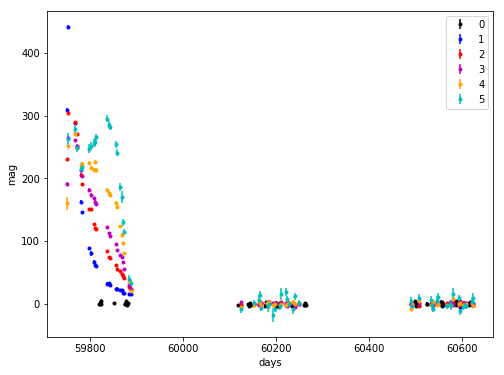

In [69]:
plotlc(obj_20934, time_key='mjd', mag_key='flux', filter_key='passband', err_key = 'flux_err')
